# Nilearn Workshop

In [2]:
print("Hello world")

Hello world


In [3]:
name = "Ifat"
print(f'Hello {name}')

Hello Ifat


In [5]:
import numpy as np
import pandas as pd
import nilearn
import matplotlib.pyplot as plt
import nilearn.plotting

Matplotlib is building the font cache; this may take a moment.


In [14]:
betaMap = '/Users/jiaruonan/nilearn_worshop_data/beta_t_maps/cope1.nii.gz'


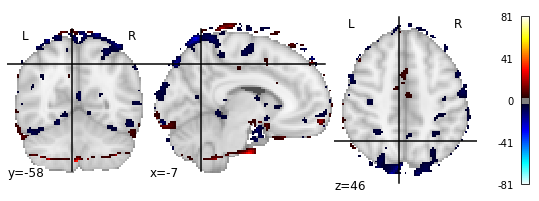

In [16]:
nilearn.plotting.plot_stat_map(betaMap, threshold=4)

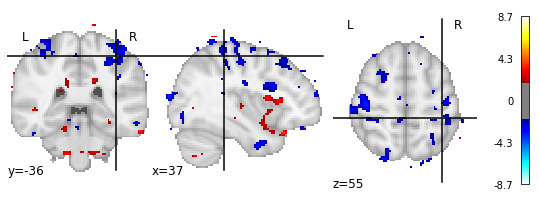

In [19]:
tMap = '/Users/jiaruonan/nilearn_worshop_data/beta_t_maps/zstat1.nii.gz'

nilearn.plotting.plot_stat_map(tMap, threshold=2)

In [20]:
import nilearn.input_data
coords = [[12, 56, 4]]
tr = 2 # neurofeedback TR - but should check first
masker = nilearn.input_data.NiftiSpheresMasker(seeds=coords, radius = 5,
                                               smoothing_fwhm=5, standardize=True,
                                               detrend=True, t_r=tr, high_pass=.01, low_pass=.1, 
                                               memory_level=5, memory = "nilearn",
                                               verbose = 9).fit()

In [21]:
nifile = r'/Users/jiaruonan/nilearn_worshop_data/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'

In [22]:
timeline = masker.transform(nifile)

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/jiaruonan/nilearn_worshop_data/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 5,
  'seeds': [[12, 56, 4]],
  'smoothing_fwhm': 5,
  'standardize': True,
  't_r': 2}, confounds=None, dtype=None, memory=Memory(location=nilearn/joblib), memory_level=5, verbose=9)
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Users/jiaruonan/nilearn_worshop_data/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Smoothing images
________________________________________________________________________________
[Memory] Calling nilearn.image.image.smooth_img..

/anaconda3/envs/fmri_analysis/lib/python3.7/site-packages/nilearn/input_data/base_masker.py:94: UserWarning: Persisting input arguments took 7.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  imgs, parameters['smoothing_fwhm'])


______________________________________________________smooth_img - 47.1s, 0.8min
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_spheres_masker.nifti_spheres_masker_extractor...
nifti_spheres_masker_extractor(<nibabel.nifti1.Nifti1Image object at 0x1a16ada250>)


/anaconda3/envs/fmri_analysis/lib/python3.7/site-packages/nilearn/input_data/base_masker.py:100: UserWarning: Persisting input arguments took 5.29s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  memory_level=memory_level)(imgs)


__________________________________nifti_spheres_masker_extractor - 43.7s, 0.7min
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.signal.clean...
clean(array([[843.897216],
       ...,
       [839.981468]]), detrend=True, standardize=True, t_r=2, low_pass=0.1, high_pass=0.01, confounds=None, sessions=None)
____________________________________________________________clean - 0.0s, 0.0min
_____________________________________________filter_and_extract - 135.3s, 2.3min


In [23]:
timeline.shape

(150, 1)

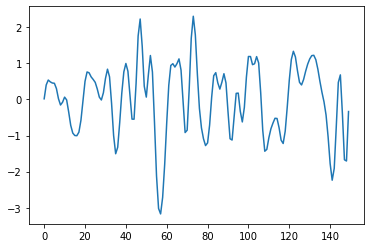

In [24]:
plt.plot(timeline)